In [1]:
# TO DO: Should have a list of installed packages? Check Docker possibilities
# ------------------------ Future improvements
# TO DO: Add a Channel (GPRS, Satellite and No Attempt) graph
# TO DO: Improve logging
# TO DO: Read me - How to use

In [2]:
# Importing packages
from ipynb.fs.full.my_functions import *

In [3]:
# Call function to retrieve month and year variables from user
(month, year) = period()

Enter month (1 or 2 digits):  3
Enter year (4 digits):  2021


In [4]:
# Call function to retrieve config information
(db_username, db_password, db_host, db_alias, dbexp_username, dbexp_password, dbexp_host, dbexp_alias, abr_log_location, mm_log_location, output_log_location, images_location, report_location) = config_read(month, year)

In [5]:
# Call function for variables and logging
(a) = variables_decl(month, year)  # variable 'a' represents the seconds that is considered a delay (300s = 5 min.)

In [6]:
# Call function for database import (dataframes)
(df, df_sb) = db_import(db_username, db_password, db_host, db_alias)

In [7]:
# Call function for formatting dataframes - have to add those columns in the actual script, otherwise it gives problems with the accents
df_sb.columns=['NAME'] 
for i in range(0,len(df_sb['NAME']),1):
    df_sb['SECTION_DEBUT'] = "Section Début: " + df_sb.loc[:,'NAME'] + " "
    df_sb['CANTON'] = "Canton: " + df_sb.loc[:,'NAME'] + " "
    df_sb['SECTION_TETE'] = "Section da Tête: " + df_sb.loc[:,'NAME'] + " "
(df, df_sb) = df_format(df, df_sb)

In [8]:
# Call function for splitting dataframes and dropping original dataframe
(df, df_sent, df_received, df_loco) = df_split(df)

In [9]:
# Call function for dataframe filtering (part I)
(df_sent, df_received) = filter_I(df_sent, df_received, month, year)

In [10]:
# Call function to get total number of sent messages, received messages and total messages (sent+received)
(totalSentMessages, totalReceivedMessages, totalMessages) = count_messages(df_sent, df_received)

In [11]:
# Call function to get the number of sent, received and total messages for each locomotive
(df_loco) = loco_count(df_loco, df_sent, df_received)

In [12]:
# Call function to return the average delivery of all sent and received messages
(averageSentDelivery, averageReceivedDelivery, averageTotalDelivery) = average_delivery(df_sent,df_received, totalSentMessages, totalReceivedMessages)

In [13]:
# Call function to return the number of sent, received and total messages with delay per locomotive
(df_loco) = loco_delay_count(df_loco, df_sent, df_received, a)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


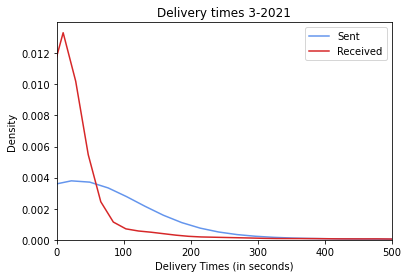

In [14]:
# Call function to create a density graph for sent and received messages
dens_graph(df_sent, df_received, month, year, images_location)

In [15]:
# Call function to calculate % and total amount of messages that took more than 5min
(percentageSentDelay, totalSentDelay, percentageReceivedDelay, totalReceivedDelay, percentageTotalDelay, totalDelay) = calc_delay(df_sent, df_received, totalSentMessages, totalReceivedMessages, a)

In [16]:
# Call function for dataframe filtering (part II)
(df_sent, df_received) = filter_II(df_sent, df_received, a)

In [17]:
# Call function to prepare dataframe df_sent and df_received for time series
(df_sent, df_received, ts_sent, ts_received) = ts_prep(df_sent, df_received)

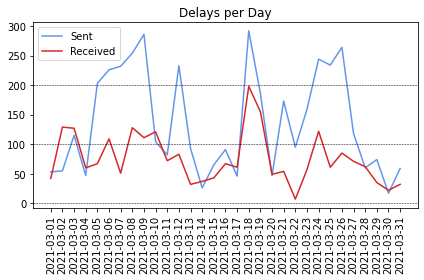

In [18]:
# Call function to create time series graph for sent and receives messages
ts_graph(ts_sent, ts_received, month, year, images_location)

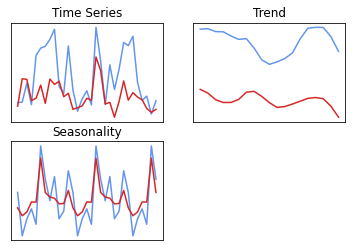

In [19]:
# Call function to display time series' decompose (trend and seasonal)
ts_decompose(ts_sent, ts_received, month, year, images_location)

In [20]:
# Call function for converting and formatting the new time series dataframe
(ts_total) = time_series_conv(ts_sent, ts_received)

In [21]:
# Call function to prepare dataframe for channel information
(df_sent, df_received) = df_prep_channel(df_sent, df_received)

In [22]:
# Call function to import log
(mm_log, abr_log_sent, abr_log_received) = import_log(abr_log_location, mm_log_location)

In [23]:
# Call function to get the number of delays per channel for SENT messages
(df_sent) = sent_channel_analysis(df_sent, mm_log, abr_log_sent, month, year)

In [24]:
# Call function to get the number of delays per channel for RECEIVED messages
(df_received) = received_channel_analysis(df_received, mm_log, abr_log_received, month, year)

In [25]:
# Call function to return the total of delays per channel and queue delays for SENT messages
(gprs_delay_sent, inmarsat_delay_sent, gprs_queue_sent, inmarsat_queue_sent, gprs_non_queue_sent, inmarsat_non_queue_sent, no_attempt_sent, perc_gprs_delay_sent, perc_inmarsat_delay_sent, perc_no_attempt_sent, perc_gprs_queue_sent, perc_gprs_non_queue_sent, perc_inmarsat_queue_sent, perc_inmarsat_non_queue_sent, perc_total_queue_sent, perc_total_non_queue_sent) = channel_calc_sent(df_sent, totalSentDelay) 

In [26]:
# Call function to return the total of delays per channel for RECEIVED messages
(gprs_delay_received, inmarsat_delay_received, perc_gprs_delay_received, perc_inmarsat_delay_received) = channel_calc_received(df_received, totalReceivedDelay)

In [27]:
# Call function to get total number of sent messages and received messages
(totalSentMessageDelay, totalReceivedMessageDelay, no_use_variable) = count_messages(df_sent, df_received) 
del no_use_variable # deleting the variable with no use - The function is also used in other parts of codes and returns 3 results. For this block only 2 are needed.

In [28]:
# Call function to get the % of delays per locomotive
(df_loco) = perc_delay_loco(df_loco)

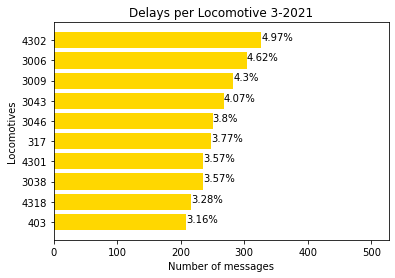

In [29]:
# Call function to display the top 10 locomotives with delay
barplot_loco(df_loco, month, year, images_location)

In [30]:
# Call function to return the average delivery of all sent and received messages with delay
(averageSentDeliveryDelay, averageReceivedDeliveryDelay, averageDeliveryDelay) = average_delivery(df_sent,df_received, totalSentMessageDelay, totalReceivedMessageDelay)

In [31]:
# Call function for dataframe filtering (part III) - Preparing for df_sb calculations
(df_sent, df_received) = filter_III(df_sent, df_received)

In [32]:
# Call function to return the average delivery of all sent and received messages after filtering part III
(totalSentMessageDelay, totalReceivedMessageDelay, no_use_variable) = count_messages(df_sent, df_received) 
del no_use_variable # deleting the variable with no use - The function is also used in other parts of codes and returns 3 results. For this block only 2 are needed.

In [33]:
# Call function to return the number of delays per SB and average delivery times per SB
(df_sb,totalReceivedMessageDelay) = sb_calc(df_sb, df_sent, df_received, totalSentMessageDelay, totalReceivedMessageDelay)

In [34]:
# Call function to calculate the average delay per SB
(df_sb) = aver_delay_sb(df_sb)

In [35]:
# Call function to calculate the % of delays per SB
(df_sb) = perc_sb(df_sb, totalSentMessageDelay, totalReceivedMessageDelay)

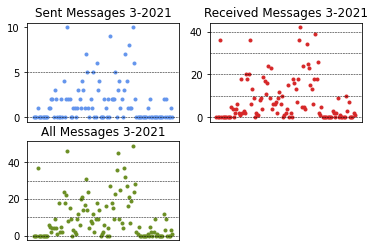

In [36]:
# Call function to create a disperity graph for sent, received and total messages
disp_all_graph(df_sb, month, year, images_location)

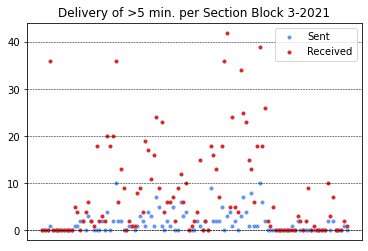

In [37]:
# Call function to create a disperity graph for sent and received combined
disp_sent_received_graph(df_sb, month, year, images_location)

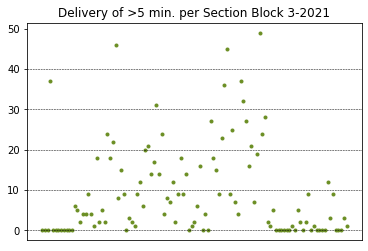

In [38]:
# Call function to create a disperity graph for total messages
disp_total_graph(df_sb, month, year, images_location)

In [39]:
# Call function for creating variables to prepare the TOP 10 SB horizontal barplots
(top10_Sent, top10_Received, top10_Total) = order_barplot(df_sb)

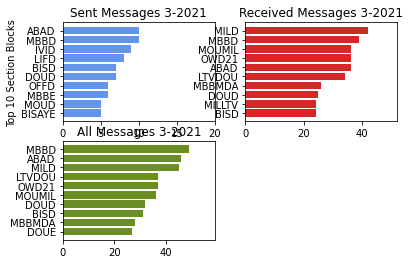

In [40]:
# Call function for creating horizontal barplot of sent, received and total SBs combined
barplot_all(df_sb, top10_Sent, top10_Received, top10_Total, month, year, images_location)

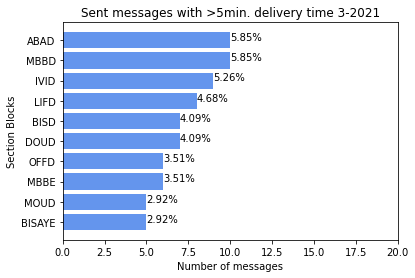

In [41]:
# Call function for creating horizontal barplot of sent SBs
barplot_sent(df_sb, top10_Sent, month, year, images_location)

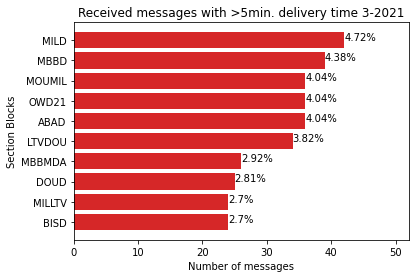

In [42]:
# Call function for creating horizontal barplot of received SBs
barplot_received(df_sb, top10_Received, month, year, images_location)

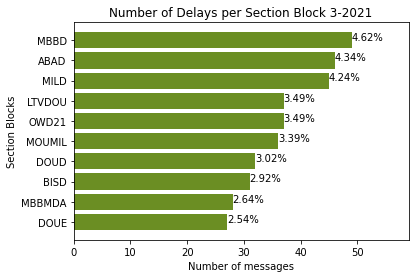

In [43]:
# Call function for creating horizontal barplot of total SBs (sent + received)
barplot_total(df_sb, top10_Total, month, year, images_location)

In [44]:
# Call function to prepare images for database insertion
(density, dispersion_all, dispersion_sent_received, dispersion_total, bar_all, bar_sent, bar_received, bar_total, bar_loco, time_series, time_series_decompose, month, year) = var_prep(month, year)

In [45]:
# Call function for database insertion
db_insert(month, year, density, dispersion_all, dispersion_sent_received, dispersion_total, bar_all, bar_sent, bar_received, bar_total, bar_loco, time_series, time_series_decompose, totalSentMessages, averageSentDelivery, percentageSentDelay, totalSentDelay, averageSentDeliveryDelay, totalReceivedMessages, averageReceivedDelivery, percentageReceivedDelay, totalReceivedDelay, averageReceivedDeliveryDelay,totalMessages, averageTotalDelivery, percentageTotalDelay, totalDelay, averageDeliveryDelay, df_sb, df_loco, ts_total, gprs_delay_sent, inmarsat_delay_sent, gprs_queue_sent, inmarsat_queue_sent, gprs_non_queue_sent, inmarsat_non_queue_sent, no_attempt_sent, perc_gprs_delay_sent, perc_inmarsat_delay_sent, perc_no_attempt_sent, perc_gprs_queue_sent, perc_gprs_non_queue_sent, perc_inmarsat_queue_sent, perc_inmarsat_non_queue_sent, perc_total_queue_sent, perc_total_non_queue_sent, gprs_delay_received, inmarsat_delay_received, perc_gprs_delay_received, perc_inmarsat_delay_received, dbexp_username, dbexp_password, dbexp_host, dbexp_alias)

In [46]:
# Call function to create a Communication Report
report(month, year, totalSentMessages, totalReceivedMessages, totalMessages, averageSentDelivery, averageReceivedDelivery, averageTotalDelivery, percentageSentDelay, totalSentDelay, percentageReceivedDelay, totalReceivedDelay, percentageTotalDelay, totalDelay, a, averageSentDeliveryDelay, averageReceivedDeliveryDelay, averageDeliveryDelay, gprs_delay_sent, inmarsat_delay_sent, gprs_queue_sent, inmarsat_queue_sent, gprs_non_queue_sent, inmarsat_non_queue_sent, no_attempt_sent, perc_gprs_delay_sent, perc_inmarsat_delay_sent, perc_no_attempt_sent, perc_gprs_queue_sent, perc_gprs_non_queue_sent, perc_inmarsat_queue_sent, perc_inmarsat_non_queue_sent, perc_total_queue_sent, perc_total_non_queue_sent, gprs_delay_received, inmarsat_delay_received, perc_gprs_delay_received, perc_inmarsat_delay_received, ts_total, df_loco, df_sb, images_location, report_location)

D:\anaconda\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


  0%|          | 0/1 [00:00<?, ?it/s]